In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# New Section

In [0]:
path = '/content/New Text Document.txt'
data = pd.read_csv(path, header=None, names=['Exam 1', 'Exam 2', 'Admitted'])


In [0]:
print('data = ')
print(data.head(10) )
print()
print('data.describe = ')
print(data.describe())



data = 
      Exam 1     Exam 2  Admitted
0  34.623660  78.024693         0
1  30.286711  43.894998         0
2  35.847409  72.902198         0
3  60.182599  86.308552         1
4  79.032736  75.344376         1
5  45.083277  56.316372         0
6  61.106665  96.511426         1
7  75.024746  46.554014         1
8  76.098787  87.420570         1
9  84.432820  43.533393         1

data.describe = 
           Exam 1      Exam 2    Admitted
count  100.000000  100.000000  100.000000
mean    65.644274   66.221998    0.600000
std     19.458222   18.582783    0.492366
min     30.058822   30.603263    0.000000
25%     50.919511   48.179205    0.000000
50%     67.032988   67.682381    1.000000
75%     80.212529   79.360605    1.000000
max     99.827858   98.869436    1.000000


In [0]:
positive = data[data['Admitted'].isin([1])]
negative = data[data['Admitted'].isin([0])]
print('Admitted Student',positive)
print("+++++++++++++++++++++++")
print('Nonadmitted Student',negative)

Admitted Student        Exam 1     Exam 2  Admitted
3   60.182599  86.308552         1
4   79.032736  75.344376         1
6   61.106665  96.511426         1
7   75.024746  46.554014         1
8   76.098787  87.420570         1
9   84.432820  43.533393         1
12  82.307053  76.481963         1
13  69.364589  97.718692         1
15  53.971052  89.207350         1
16  69.070144  52.740470         1
18  70.661510  92.927138         1
19  76.978784  47.575964         1
21  89.676776  65.799366         1
24  77.924091  68.972360         1
25  62.271014  69.954458         1
26  80.190181  44.821629         1
30  61.379289  72.807887         1
31  85.404519  57.051984         1
33  52.045405  69.432860         1
37  64.176989  80.908061         1
40  83.902394  56.308046         1
42  94.443368  65.568922         1
46  77.193035  70.458200         1
47  97.771599  86.727822         1
48  62.073064  96.768824         1
49  91.564974  88.696293         1
50  79.944818  74.163119         1
51 

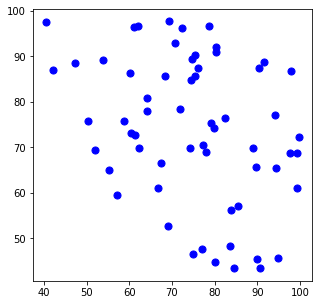

In [0]:
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(positive['Exam 1'], positive['Exam 2'], s=50, c='b', marker='o', label='Admitted')


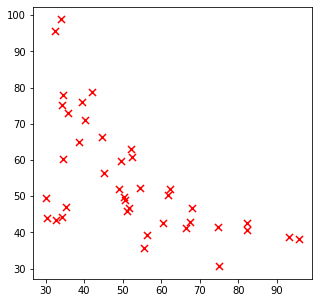

In [0]:
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(negative['Exam 1'], negative['Exam 2'], s=50, c='r', marker='x', label='Not Admitted')

Text(0, 0.5, 'Exam 2 Score')

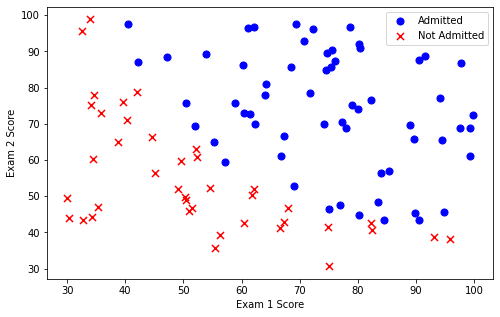

In [0]:
fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(positive['Exam 1'], positive['Exam 2'], s=50, c='b', marker='o', label='Admitted')
ax.scatter(negative['Exam 1'], negative['Exam 2'], s=50, c='r', marker='x', label='Not Admitted')
ax.legend()
ax.set_xlabel('Exam 1 Score')
ax.set_ylabel('Exam 2 Score')


In [0]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))


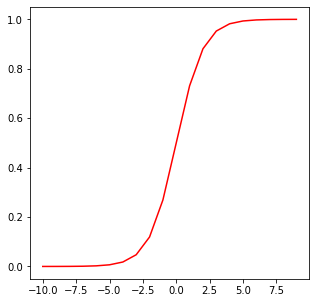

In [0]:
nums = np.arange(-10, 10, step=1)

fig, ax = plt.subplots(figsize=(5,5))
ax.plot(nums, sigmoid(nums), 'r')


In [0]:
def cost(theta, X, y):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    first = np.multiply(-y, np.log(sigmoid(X * theta.T)))
    second = np.multiply((1 - y), np.log(1 - sigmoid(X * theta.T)))
    return np.sum(first - second) / (len(X))

# add a ones column - this makes the matrix multiplication work out easier
data.insert(0, 'Ones', 1)


In [0]:
print('New Data \n',data)

New Data 
     Ones     Exam 1     Exam 2  Admitted
0      1  34.623660  78.024693         0
1      1  30.286711  43.894998         0
2      1  35.847409  72.902198         0
3      1  60.182599  86.308552         1
4      1  79.032736  75.344376         1
..   ...        ...        ...       ...
95     1  83.489163  48.380286         1
96     1  42.261701  87.103851         1
97     1  99.315009  68.775409         1
98     1  55.340018  64.931938         1
99     1  74.775893  89.529813         1

[100 rows x 4 columns]


In [0]:
# set X (training data) and y (target variable)
cols = data.shape[1]
X = data.iloc[:,0:cols-1]
y = data.iloc[:,cols-1:cols]


In [0]:
print(X)

    Ones     Exam 1     Exam 2
0      1  34.623660  78.024693
1      1  30.286711  43.894998
2      1  35.847409  72.902198
3      1  60.182599  86.308552
4      1  79.032736  75.344376
..   ...        ...        ...
95     1  83.489163  48.380286
96     1  42.261701  87.103851
97     1  99.315009  68.775409
98     1  55.340018  64.931938
99     1  74.775893  89.529813

[100 rows x 3 columns]


In [0]:
print(y)

    Admitted
0          0
1          0
2          0
3          1
4          1
..       ...
95         1
96         1
97         1
98         1
99         1

[100 rows x 1 columns]


In [0]:
# convert to numpy arrays and initalize the parameter array theta
X = np.array(X.values)
y = np.array(y.values)
theta = np.zeros(3)


In [0]:
print()
print('X.shape = ' , X.shape)
print('theta.shape = ' , theta.shape)
print('y.shape = ' , y.shape)



X.shape =  (100, 3)
theta.shape =  (3,)
y.shape =  (100, 1)


In [0]:
thiscost = cost(theta, X, y)
print()
print('cost = ' , thiscost)



cost =  0.6931471805599453


In [0]:
def gradient(theta, X, y):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    
    parameters = int(theta.ravel().shape[1])
    grad = np.zeros(parameters)
    
    error = sigmoid(X * theta.T) - y
    
    for i in range(parameters):
        term = np.multiply(error, X[:,i])
        grad[i] = np.sum(term) / len(X)
      #  print('grad[',i,'] \n',grad[i])
    
    return grad
  


In [0]:
import scipy.optimize as opt
result = opt.fmin_tnc(func=cost, x0=theta, fprime=gradient, args=(X, y))
print('result = ',result)

result =  (array([-25.16131863,   0.20623159,   0.20147149]), 36, 0)


In [0]:
print('cost = ',thiscost)
costafteroptimize = cost(result[0], X, y)
print()
print('cost after optimize = ' , costafteroptimize)
print()


cost =  0.6931471805599453

cost after optimize =  0.20349770158947458



In [0]:
def predict(theta, X):
    probability = sigmoid(X * theta.T)
    return [1 if x >= 0.5 else 0 for x in probability]

theta_min = np.matrix(result[0])
predictions = predict(theta_min, X)
print('New Prdect = ' , predictions)

correct = [1 if ((a == 1 and b == 1) or (a == 0 and b == 0)) else 0 for (a, b) in zip(predictions, y)]
accuracy = (sum(map(int, correct)) % len(correct))
print ('accuracy = {0}%'.format(accuracy))


New Prdect =  [0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1]
accuracy = 89%
